In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import he_normal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [9]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [11]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## **Mode 1 "784 - 512 - 256 - 10"** 2 hidden layers

In [15]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu', kernel_initializer=he_normal()) )
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(output_dim, activation='softmax'))
print(model1.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total para

In [16]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.4046 - acc: 0.8799 - val_loss: 0.1351 - val_acc: 0.9577
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1910 - acc: 0.9414 - val_loss: 0.1003 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1489 - acc: 0.9542 - val_loss: 0.0836 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1292 - acc: 0.9599 - val_loss: 0.0812 - val_acc: 0.9733
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1097 - acc: 0.9657 - val_loss: 0.0727 - val_acc: 0.9762
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1009 - acc: 0.9686 - val_loss: 0.0711 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0928 - acc: 0.9710 - val_loss: 0.0690 - val_ac

In [23]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']

Test score: 0.049794562924746426
Test accuracy: 0.9853


Text(0.5, 0, 'Number Of Epochs')

Text(0, 0.5, 'Categorical Cross  Entrophy loss')

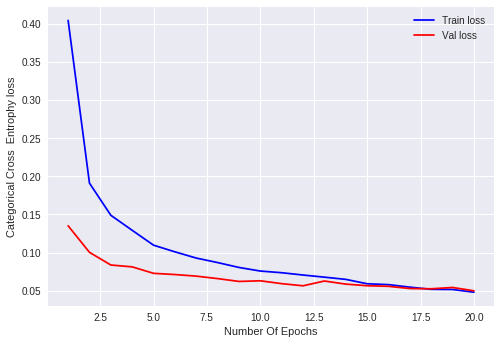

In [25]:
plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()


## **Model 2 "784 - 512 - 256 - 128 "**  
3 hidden layers

In [26]:
model2 = Sequential()

model2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='relu', kernel_initializer=he_normal()) )
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu', kernel_initializer=he_normal()) )
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(output_dim, activation='softmax'))
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
__________

In [31]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0609 - acc: 0.9816 - val_loss: 0.0596 - val_acc: 0.9850
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0596 - acc: 0.9815 - val_loss: 0.0627 - val_acc: 0.9829
Epoch 3/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0579 - acc: 0.9826 - val_loss: 0.0566 - val_acc: 0.9841
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0566 - acc: 0.9821 - val_loss: 0.0607 - val_acc: 0.9835
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0588 - val_acc: 0.9849
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0543 - acc: 0.9832 - val_loss: 0.0549 - val_acc: 0.9850
Epoch 7/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0525 - acc: 0.9843 - val_loss: 0.0609 - val_ac

In [28]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']

Test score: 0.05817717350655002
Test accuracy: 0.9827


Text(0.5, 0, 'Number Of Epochs')

Text(0, 0.5, 'Categorical Cross  Entrophy loss')

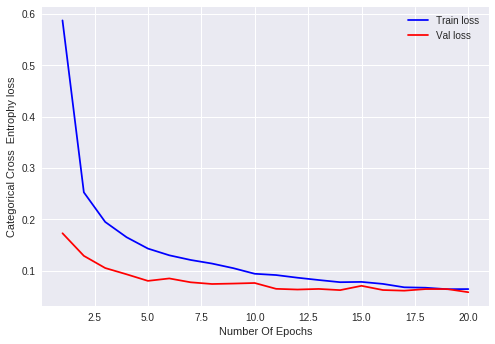

In [29]:
plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()


## **Model 3 "784 - 512 - 256 - 128 - 64 - 32 - 10"**

In [32]:
model3 = Sequential()

model3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(256, activation='relu', kernel_initializer=he_normal()) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(128, activation='relu', kernel_initializer=he_normal()) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(64, activation='relu', kernel_initializer=he_normal()) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(32, activation='relu', kernel_initializer=he_normal()) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(output_dim, activation='softmax'))
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
__________

In [33]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 1.4707 - acc: 0.5175 - val_loss: 0.3627 - val_acc: 0.9050
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.5984 - acc: 0.8319 - val_loss: 0.2019 - val_acc: 0.9445
Epoch 3/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.4121 - acc: 0.8942 - val_loss: 0.1766 - val_acc: 0.9533
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3276 - acc: 0.9224 - val_loss: 0.1448 - val_acc: 0.9639
Epoch 5/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.2921 - acc: 0.9308 - val_loss: 0.1398 - val_acc: 0.9661
Epoch 6/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.2617 - acc: 0.9384 - val_loss: 0.1180 - val_acc: 0.9708
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2335 - acc: 0.9463 - val_loss: 0.1124 -

In [34]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']

Test score: 0.08252474371280986
Test accuracy: 0.9805


Text(0.5, 0, 'Number Of Epochs')

Text(0, 0.5, 'Categorical Cross  Entrophy loss')

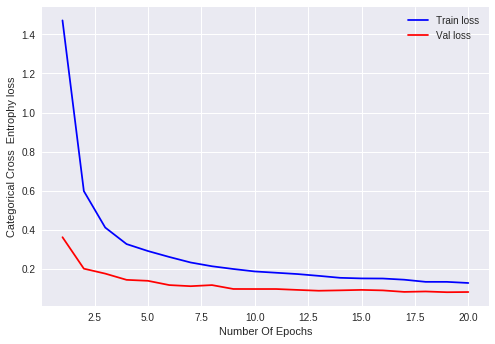

In [35]:
plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()


### Observation

as the number of hidden layers incresed we get found decrease in the accuracy 

for model with two hidden layers :- 0.9853

for model with three hidden layers :- 0.9827

for model with five hidden layers :- 0.9805